<a href="https://colab.research.google.com/github/NalawadePratima/retail-product-recommender-xai/blob/main/new_retail_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load datasets (you should already have these)
orders = pd.read_csv('/content/drive/MyDrive/instacart-market-basket-analysisdata/orders.csv')
order_products = pd.read_csv('/content/drive/MyDrive/instacart-market-basket-analysisdata/all_order_products.csv')
products = pd.read_csv('/content/drive/MyDrive/instacart-market-basket-analysisdata/products.csv')


In [5]:
import numpy as np
print(np.__version__)
print(hasattr(np, "dtypes"))  # This should print True


1.26.4
True


In [6]:
# Merge all orders with product interactions
merged_df = pd.merge(order_products, orders, on='order_id')
merged_df = pd.merge(merged_df, products, on='product_id')

# Keep only required columns
merged_df = merged_df[['user_id', 'product_id', 'product_name']]
merged_df.head()


,user_id,product_id,product_name
0,202279,33120,Organic Egg Whites
1,202279,28985,Michigan Organic Kale
2,202279,9327,Garlic Powder
3,202279,45918,Coconut Butter
4,202279,30035,Natural Sweetener


from matplotlib import pyplot as plt
_df_0['product_id'].plot(kind='hist', bins=20, title='product_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('product_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['user_id']
  ys = series['product_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('user_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='product_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('product_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['user_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'user_id'}, axis=1)
              .sort_values('user_id', ascending=True))
  xs = counted['user_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('user_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='product_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['product_id'].plot(kind='line', figsize=(8, 4), title='product_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['product_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='product_id', y='product_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

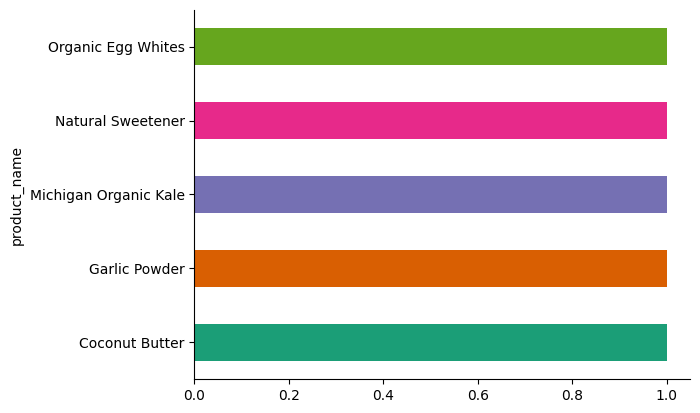

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('product_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
user_product_interactions = merged_df.groupby(['user_id', 'product_id']).size().reset_index(name='purchase_count')
user_product_interactions.head()


,user_id,product_id,purchase_count
0,1,196,11
1,1,10258,10
2,1,10326,1
3,1,12427,10
4,1,13032,4


In [19]:
user_product_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863746 entries, 0 to 13863745
Data columns (total 3 columns):
 #   Column          Dtype
---  ------          -----
 0   user_id         int64
 1   product_id      int64
 2   purchase_count  int64
dtypes: int64(3)
memory usage: 317.3 MB


In [18]:
user_product_interactions.describe()

,user_id,product_id,purchase_count
count,1.386375e+07,1.386375e+07,1.386375e+07
mean,1.030158e+05,2.551068e+04,2.439392e+00
std,5.943946e+04,1.422548e+04,3.548338e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.160325e+04,1.329200e+04,1.000000e+00
50%,1.027330e+05,2.563800e+04,1.000000e+00
75%,1.544780e+05,3.815400e+04,2.000000e+00
max,2.062090e+05,4.968800e+04,1.000000e+02


from matplotlib import pyplot as plt
_df_6['user_id'].plot(kind='hist', bins=20, title='user_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['product_id'].plot(kind='hist', bins=20, title='product_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['purchase_count'].plot(kind='hist', bins=20, title='purchase_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='user_id', y='product_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='product_id', y='purchase_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['user_id'].plot(kind='line', figsize=(8, 4), title='user_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['product_id'].plot(kind='line', figsize=(8, 4), title='product_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['purchase_count'].plot(kind='line', figsize=(8, 4), title='purchase_count')
plt.gca().spines[['top', 'right']].set_visible(False)

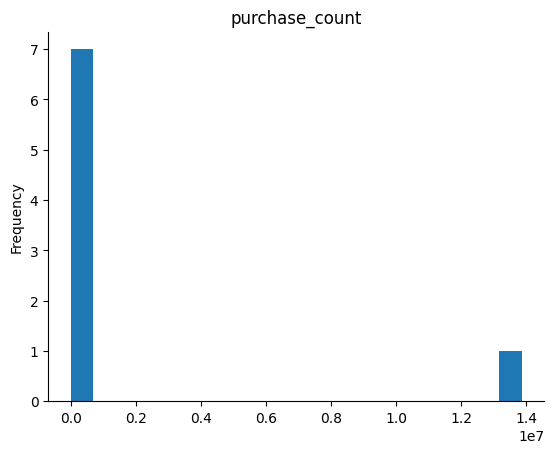

In [20]:
from matplotlib import pyplot as plt
_df_8['purchase_count'].plot(kind='hist', bins=20, title='purchase_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [2]:
import numpy as np
print(np.__version__)
print(hasattr(np, "dtypes"))  # This should print True


1.26.4
True


In [11]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [8]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505215 sha256=f0ae7123ffb25b7965e9da55df1a8a4ca4cd37a623c28acebf191c0d43f53822
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [13]:
!pip install --upgrade jax jaxlib --no-cache-dir


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 MB 159.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.


In [12]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [8]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy

reader = Reader(rating_scale=(1, user_product_interactions['purchase_count'].max()))

data = Dataset.load_from_df(user_product_interactions[['user_id', 'product_id', 'purchase_count']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))


RMSE: 3.4704
RMSE: 3.4704290506895155


In [21]:
print("MAE:", accuracy.mae(predictions))

MAE:  1.7699
MAE: 1.7698886172621293


In [9]:
#e’s how to generate top recommendations for a sample user:
from collections import defaultdict

def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort predictions for each user and return the highest n
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=5)

# Show top 5 recommended product IDs for user 1
top_n[1]


[(13032, 1.746753743793819)]

In [10]:
!pip install transformers


In [12]:
from transformers import pipeline, set_seed
set_seed(42)

generator = pipeline('text-generation', model='gpt2')

def explain_recommendation(past_items, recommended_item):
    prompt = f"You bought: {', '.join(past_items)}.\nSo, we recommend: {recommended_item}.\nBecause:"
    result = generator(prompt, max_length=50, num_return_sequences=1)
    return result[0]['generated_text']


Device set to use cpu


In [13]:
past_items = ['milk', 'bread', 'eggs']
recommended_item = 'butter'

explanation = explain_recommendation(past_items, recommended_item)
print(explanation)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


You bought: milk, bread, eggs.
So, we recommend: butter.
Because: chocolate.
This: Butterless eggs. Butterless butter.
And this: Chocolate, butterless.
And this: Vanilla, so soft


In [14]:
past_items = ['organic bananas', 'almond milk', 'chia seeds']
recommended_item = 'granola bars'


In [15]:
explanation = explain_recommendation(past_items, recommended_item)
print("Generated Explanation:\n", explanation)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Explanation:
 You bought: organic bananas, almond milk, chia seeds.
So, we recommend: granola bars.
Because:
We only buy whole fruit varieties, not just a specific ingredient. The first thing to know is that you don't


In [16]:
user_id = 123
past_items = ['avocados', 'whole wheat bread', 'spinach']  # You can extract from user’s prior orders

# Assume you have your recommendation system output like:
recommended_items = ['hummus', 'quinoa', 'almond milk']

for rec_item in recommended_items:
    explanation = explain_recommendation(past_items, rec_item)
    print(f"🛍️ Recommendation: {rec_item}")
    print(f"💬 Explanation: {explanation}")
    print("="*50)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🛍️ Recommendation: hummus
💬 Explanation: You bought: avocados, whole wheat bread, spinach.
So, we recommend: hummus.
Because: yogurt. Seriously. Because yogurt.
So, we recommend: hummus.
Because: yogurts, such as


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🛍️ Recommendation: quinoa
💬 Explanation: You bought: avocados, whole wheat bread, spinach.
So, we recommend: quinoa.
Because: it's a lot of work, and usually costs more. (And often times, getting the right amount of quinoa in
🛍️ Recommendation: almond milk
💬 Explanation: You bought: avocados, whole wheat bread, spinach.
So, we recommend: almond milk.
Because:
1. Be aware that the water will run out, but your water will still be there, so you wont see it
